In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

In [ ]:
import zipfile

local_zip = './drive/MyDrive/indonesian_food.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./data')
zip_ref.close()

In [ ]:
train_dir = os.path.join('./data/indonesian food', 'train')
validation_dir = os.path.join('./data/indonesian food', 'validation')
test_dir = os.path.join('./data/indonesian food', 'test')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range=0.2,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                  horizontal_flip=True
                                   )

test_datagen  = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range=0.2,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                  horizontal_flip=True
                                   )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size=(150, 150))

Found 2075 images belonging to 13 classes.
Found 260 images belonging to 13 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(13, activation='softmax')
])

model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 dropout_110 (Dropout)       (None, 75, 75, 64)        0         
                                                                 
 conv2d_100 (Conv2D)         (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 37, 37, 128)      0         
 g2D)                                                            
                                                                 
 dropout_111 (Dropout)       (None, 37, 37, 128)     

In [ ]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    verbose=1,
                    callbacks=early)

Epoch 1/100
104/104 [==============================] - 343s 3s/step - loss: 2.4974 - accuracy: 0.1335 - val_loss: 2.2828 - val_accuracy: 0.2500
Epoch 2/100
104/104 [==============================] - 339s 3s/step - loss: 2.1652 - accuracy: 0.2414 - val_loss: 2.0807 - val_accuracy: 0.3308
Epoch 3/100
104/104 [==============================] - 336s 3s/step - loss: 1.9791 - accuracy: 0.3176 - val_loss: 1.9314 - val_accuracy: 0.3192
Epoch 4/100
104/104 [==============================] - 336s 3s/step - loss: 1.8918 - accuracy: 0.3533 - val_loss: 1.8414 - val_accuracy: 0.3769
Epoch 5/100
104/104 [==============================] - 340s 3s/step - loss: 1.8029 - accuracy: 0.3812 - val_loss: 1.7147 - val_accuracy: 0.3846
Epoch 6/100
104/104 [==============================] - 336s 3s/step - loss: 1.7399 - accuracy: 0.4034 - val_loss: 1.7663 - val_accuracy: 0.3577
Epoch 7/100
 68/104 [==================>...........] - ETA: 1:51 - loss: 1.6920 - accuracy: 0.4236

Text(0.5, 1.0, 'Training and validation loss')

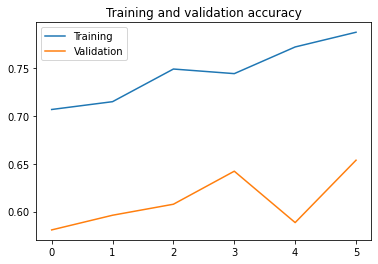

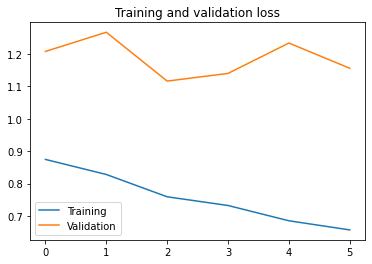

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [ ]:
#Training
train_kue_dadar_gulung_dir = os.path.join(train_dir, 'kue_dadar_gulung')
train_kue_kastengel_dir = os.path.join(train_dir, 'kue_kastengel')
train_kue_klepon_dir = os.path.join(train_dir, 'kue_klepon')
train_kue_lapis_dir = os.path.join(train_dir, 'kue_lapis')
train_kue_lumpur_dir = os.path.join(train_dir, 'kue_lumpur')
train_kue_putri_salju_dir = os.path.join(train_dir, 'kue_putri_salju')
train_kue_risoles_dir = os.path.join(train_dir, 'kue_risoles')
train_kue_serabi_dir = os.path.join(train_dir, 'kue_serabi')
train_bakso_dir = os.path.join(train_dir, 'bakso')
train_gudeg_dir = os.path.join(train_dir, 'gudeg')
train_sate_dir = os.path.join(train_dir, 'sate')
train_gado_dir = os.path.join(train_dir, 'gado')
train_rendang_dir = os.path.join(train_dir, 'rendang')

#Validation
validation_kue_dadar_gulung_dir = os.path.join(validation_dir, 'kue_dadar_gulung')
validation_kue_kastengel_dir = os.path.join(validation_dir, 'kue_kastengel')
validation_kue_klepon_dir = os.path.join(validation_dir, 'kue_klepon')
validation_kue_lapis_dir = os.path.join(validation_dir, 'kue_lapis')
validation_kue_lumpur_dir = os.path.join(validation_dir, 'kue_lumpur')
validation_kue_putri_salju_dir = os.path.join(validation_dir, 'kue_putri_salju')
validation_kue_risoles_dir = os.path.join(validation_dir, 'kue_risoles')
validation_kue_serabi_dir = os.path.join(validation_dir, 'kue_serabi')

In [ ]:
print('total training kue lumpur images :', len(os.listdir(train_kue_dadar_gulung_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_kastengel_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_klepon_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_lapis_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_lumpur_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_putri_salju_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_risoles_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_kue_serabi_dir) ))
print('total training bakso images :', len(os.listdir(train_bakso_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_gudeg_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_sate_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_gado_dir) ))
print('total training kue lumpur images :', len(os.listdir(train_rendang_dir) ))

print('total training kue lumpur images :', len(os.listdir(validation_kue_dadar_gulung_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_kastengel_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_klepon_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_lapis_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_lumpur_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_putri_salju_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_risoles_dir) ))
print('total training kue lumpur images :', len(os.listdir(validation_kue_serabi_dir) ))

total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training bakso images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 160
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20
total training kue lumpur images : 20


In [ ]:
#Transfer Learning
from keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            